In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns

reg = LinearRegression()

crab = pd.read_csv('./orientation/data/CrabAgePrediction.csv')

In [18]:
crab.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


<Axes: xlabel='Length', ylabel='Age'>

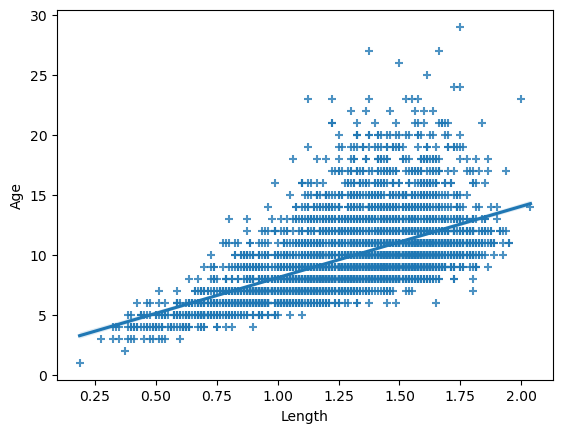

In [6]:
sns.regplot(data=crab, x='Length', y='Age', marker='+')

In [7]:
# 게의 길이에 따른 나이 예측 모델
reg.fit(crab['Length'].values.reshape(-1,1), crab['Age'])

LinearRegression()

In [8]:
# 데이터에는 없는 나이 입력해서 나이 예측
# 만약 몸 길이가 10이라면 나이는 61세라는 예측 결과 도출
reg.predict([[10]])

array([61.65218051])

이렇게 어떤 데이터가 주어졌을 때, 기존 데이터를 토대로 미지의 영역에 있는 데이터를 추정할 수 있는 기능이 선형회귀의 주 사용처 중 하나다.